## VISUALIZACIÓN Y ESTUDIO DE DATOS

In [ ]:
# LIBRERÍAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### ANÁLISIS BEHAVIOURAL

In [25]:
behavioural = pd.read_csv( "/home/jovyan/work/data/BEHAVIOURAL.csv")
behavioural.head()

,CONTRACT_ID,CLIENT_ID,DATE,CREDICT_CARD_BALANCE,CREDIT_CARD_LIMIT,CREDIT_CARD_DRAWINGS_ATM,CREDIT_CARD_DRAWINGS,CREDIT_CARD_DRAWINGS_POS,CREDIT_CARD_DRAWINGS_OTHER,CREDIT_CARD_PAYMENT,NUMBER_DRAWINGS_ATM,NUMBER_DRAWINGS,NUMBER_INSTALMENTS,CURRENCY
0,ES1821000018d00XXX,ES182394447V,2021-08-29,491.21,540.0,0.0,28.03,28.03,0.0,46.81,0.0,2,1.0,euros
1,ES1821000018d00XXX,ES182394447V,2021-07-29,466.55,540.0,162.0,612.51,450.51,0.0,108.00,3.0,15,0.0,euros
2,ES1821000018d00XXX,ES182394447V,2021-11-30,1640.35,1620.0,0.0,273.93,273.93,0.0,95.65,0.0,11,4.0,euros
3,ES1821000018d00XXX,ES182394447V,2021-10-30,1366.35,1620.0,162.0,829.88,667.88,0.0,38.29,3.0,14,3.0,euros
4,ES1821000018d00XXX,ES182394447V,2021-09-29,532.33,540.0,0.0,24.39,24.39,0.0,43.76,0.0,2,2.0,euros


In [26]:
print("Shape:", behavioural.shape)
print("\nTipos:\n", behavioural.dtypes)
print("\nNulos por columna:\n", behavioural.isna().sum())
display(behavioural.describe().T)

Shape: (1724854, 14)

Tipos:
 CONTRACT_ID                    object
CLIENT_ID                      object
DATE                           object
CREDICT_CARD_BALANCE          float64
CREDIT_CARD_LIMIT             float64
CREDIT_CARD_DRAWINGS_ATM      float64
CREDIT_CARD_DRAWINGS          float64
CREDIT_CARD_DRAWINGS_POS      float64
CREDIT_CARD_DRAWINGS_OTHER    float64
CREDIT_CARD_PAYMENT           float64
NUMBER_DRAWINGS_ATM           float64
NUMBER_DRAWINGS                 int64
NUMBER_INSTALMENTS            float64
CURRENCY                       object
dtype: object

Nulos por columna:
 CONTRACT_ID                   0
CLIENT_ID                     0
DATE                          0
CREDICT_CARD_BALANCE          0
CREDIT_CARD_LIMIT             0
CREDIT_CARD_DRAWINGS_ATM      0
CREDIT_CARD_DRAWINGS          0
CREDIT_CARD_DRAWINGS_POS      0
CREDIT_CARD_DRAWINGS_OTHER    0
CREDIT_CARD_PAYMENT           0
NUMBER_DRAWINGS_ATM           0
NUMBER_DRAWINGS               0
NUMBER_INSTALMENTS 

,count,mean,std,min,25%,50%,75%,max
CREDICT_CARD_BALANCE,1724854.0,712.708752,1283.782209,-5043.00,0.0,0.00,1089.76,16257.95
CREDIT_CARD_LIMIT,1724854.0,1829.640860,1956.419156,0.00,540.0,1350.00,2160.00,16200.00
CREDIT_CARD_DRAWINGS_ATM,1724854.0,58.588043,308.722615,-81.93,0.0,0.00,0.00,25380.00
CREDIT_CARD_DRAWINGS,1724854.0,89.589185,405.134845,-74.54,0.0,0.00,0.00,25380.00
CREDIT_CARD_DRAWINGS_POS,1724854.0,27.938011,215.944594,0.00,0.0,0.00,0.00,24720.36
CREDIT_CARD_DRAWINGS_OTHER,1724854.0,2.873773,89.926143,0.00,0.0,0.00,0.00,10800.00
CREDIT_CARD_PAYMENT,1724854.0,99.088714,384.325330,0.00,0.0,5.52,97.20,29237.94
NUMBER_DRAWINGS_ATM,1724854.0,0.255811,1.011515,0.00,0.0,0.00,0.00,44.00
NUMBER_DRAWINGS,1724854.0,0.703787,3.202438,0.00,0.0,0.00,0.00,165.00
NUMBER_INSTALMENTS,1724854.0,19.434148,20.065741,0.00,2.0,13.00,31.00,119.00


In [27]:
n_filas = behavioural.shape[0]
print(n_filas)

1724854


No hay valores nulos en el dataset.


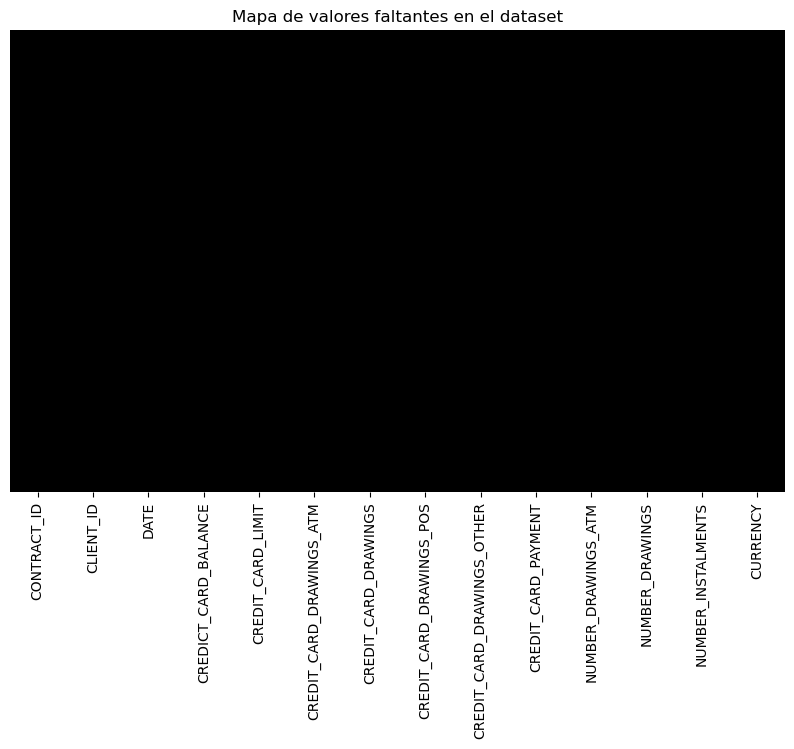

In [28]:
# Identificar Missing values
# Contar valores nulos en cada columna
missing_values = behavioural.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
missing_columns = missing_values[missing_values > 0]

# Mostrar resultados
if missing_columns.empty:
    print("No hay valores nulos en el dataset.")
else:
    print("Valores nulos por columna:")
    for column, missing in missing_columns.items():
        print(f"{column}: {missing} valores nulos")

# Gráfico de Missing Values 
plt.figure(figsize=(10, 6))
sns.heatmap(behavioural.isnull(), cmap="gray", cbar=False, yticklabels=False)
plt.title("Mapa de valores faltantes en el dataset")
plt.show()

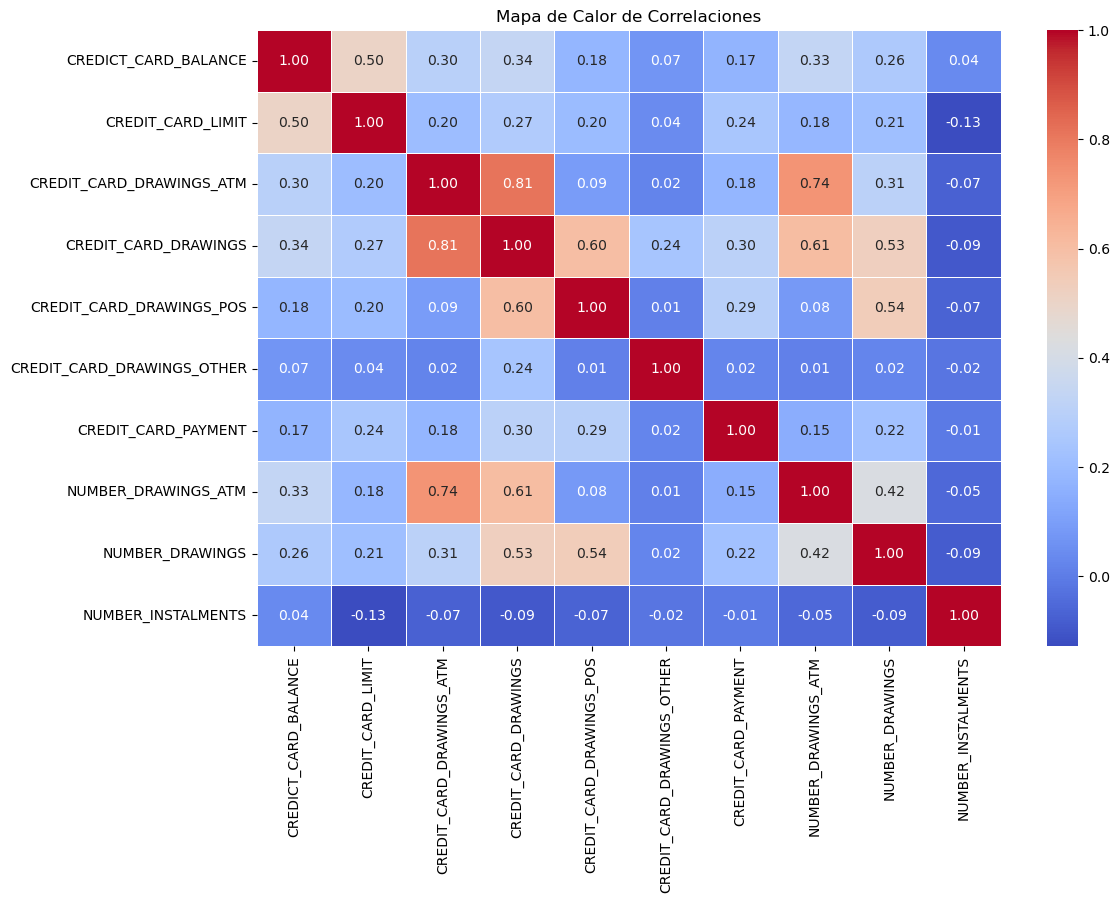

In [29]:
# Mapa térmico para estudiar la correlación entre variables.
# Calcular la matriz de correlación
bh_num = behavioural.select_dtypes(exclude=['object', 'bool'])

co_matrix = bh_num.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(co_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### ANÁLISIS CLIENTES

In [33]:
clientes = pd.read_csv("/home/jovyan/work/data/CLIENTS.csv")
clientes.head()

,CLIENT_ID,NON_COMPLIANT_CONTRACT,NAME_PRODUCT_TYPE,GENDER,TOTAL_INCOME,AMOUNT_PRODUCT,INSTALLMENT,EDUCATION,MARITAL_STATUS,HOME_SITUATION,...,LOAN_CREDIT_GRANTED_MAX,LOAN_CREDIT_GRANTED_MIN,LOAN_CREDIT_GRANTED_SUM,LOAN_VARIABLE_RATE_MAX,LOAN_VARIABLE_RATE_MIN,NUM_STATUS_ANNULLED,NUM_STATUS_AUTHORIZED,NUM_STATUS_DENIED,NUM_STATUS_NOT_USED,NUM_FLAG_INSURED
0,ES182411319L,0,PRODUCT 1,M,1350.0,6495.88,276.75,Primary School,Married,Living with relative,...,2445.12,316.82,4248.18,0.592495,0.0,0.0,5.0,0.0,0.0,3.0
1,ES182116369S,0,PRODUCT 1,F,918.0,8100.00,261.31,Secondary,Married,House,...,895.48,0.00,895.48,0.000000,0.0,1.0,1.0,0.0,0.0,0.0
2,ES182154395P,0,PRODUCT 1,M,1350.0,3234.60,298.24,Secondary,Single,House,...,731.70,352.84,1624.54,0.108909,0.0,0.0,3.0,0.0,0.0,1.0
3,ES182369450D,0,PRODUCT 1,F,1620.0,4890.24,386.37,Secondary,Single,House,...,1205.98,899.05,2105.03,0.000000,0.0,0.0,2.0,0.0,0.0,1.0
4,ES182116792X,0,PRODUCT 1,F,2430.0,5004.29,242.30,Secondary,Married,House,...,2160.00,2160.00,2160.00,0.000000,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
print("Shape:", clientes.shape)
print("\nTipos:\n", clientes.dtypes)
print("\nNulos por columna:\n", clientes.isna().sum())
display(clientes.describe().T)

Shape: (162977, 45)

Tipos:
 CLIENT_ID                       object
NON_COMPLIANT_CONTRACT           int64
NAME_PRODUCT_TYPE               object
GENDER                          object
TOTAL_INCOME                   float64
AMOUNT_PRODUCT                 float64
INSTALLMENT                    float64
EDUCATION                       object
MARITAL_STATUS                  object
HOME_SITUATION                  object
REGION_SCORE                   float64
AGE_IN_YEARS                   float64
JOB_SENIORITY                  float64
HOME_SENIORITY                 float64
LAST_UPDATE                    float64
OWN_INSURANCE_CAR               object
CAR_AGE                        float64
FAMILY_SIZE                    float64
REACTIVE_SCORING               float64
PROACTIVE_SCORING              float64
BEHAVIORAL_SCORING             float64
DAYS_LAST_INFO_CHANGE          float64
NUMBER_OF_PRODUCTS             float64
OCCUPATION                      object
DIGITAL_CLIENT                   in

,count,mean,std,min,25%,50%,75%,max
NON_COMPLIANT_CONTRACT,162977.0,0.081214,0.273164,0.000000,0.000000,0.000000,0.000000,1.000000e+00
TOTAL_INCOME,162977.0,2029.338959,3722.499128,307.800000,1350.000000,1782.000000,2430.000000,1.404000e+06
AMOUNT_PRODUCT,162977.0,7193.391443,4831.534717,540.000000,3240.000000,6162.370000,9703.800000,4.848619e+04
INSTALLMENT,162970.0,325.583354,173.477501,19.390000,198.880000,299.160000,415.787500,2.898155e+03
REGION_SCORE,162977.0,0.020516,0.012600,0.000533,0.010006,0.018850,0.028663,5.936400e-02
AGE_IN_YEARS,162977.0,43.951931,11.931164,20.517808,34.073973,43.200000,53.884932,6.908219e+01
JOB_SENIORITY,133803.0,2398.921459,2360.495553,1.000000,770.000000,1650.000000,3194.000000,1.772900e+04
HOME_SENIORITY,162977.0,4987.488180,3520.915689,0.000000,2011.000000,4508.000000,7483.000000,2.404400e+04
LAST_UPDATE,162977.0,2992.176141,1510.215965,0.000000,1714.000000,3254.000000,4297.000000,6.874000e+03
CAR_AGE,55427.0,11.987407,11.799483,0.000000,5.000000,9.000000,15.000000,6.450000e+01


In [35]:
n_fil = clientes.shape[0]
print(n_fil)

162977


Valores nulos por columna:
INSTALLMENT: 7 valores nulos
EDUCATION: 39640 valores nulos
MARITAL_STATUS: 2 valores nulos
JOB_SENIORITY: 29174 valores nulos
CAR_AGE: 107550 valores nulos
FAMILY_SIZE: 2 valores nulos
REACTIVE_SCORING: 91901 valores nulos
PROACTIVE_SCORING: 337 valores nulos
BEHAVIORAL_SCORING: 32246 valores nulos
DAYS_LAST_INFO_CHANGE: 1 valores nulos
NUMBER_OF_PRODUCTS: 21903 valores nulos
EMPLOYER_ORGANIZATION_TYPE: 29464 valores nulos
NUM_PREVIOUS_LOAN_APP: 8770 valores nulos
LOAN_ANNUITY_PAYMENT_MAX: 8770 valores nulos
LOAN_ANNUITY_PAYMENT_MIN: 8770 valores nulos
LOAN_ANNUITY_PAYMENT_SUM: 8770 valores nulos
LOAN_APPLICATION_AMOUNT_MAX: 8770 valores nulos
LOAN_APPLICATION_AMOUNT_MIN: 8770 valores nulos
LOAN_APPLICATION_AMOUNT_SUM: 8770 valores nulos
LOAN_CREDIT_GRANTED_MAX: 8770 valores nulos
LOAN_CREDIT_GRANTED_MIN: 8770 valores nulos
LOAN_CREDIT_GRANTED_SUM: 8770 valores nulos
LOAN_VARIABLE_RATE_MAX: 8770 valores nulos
LOAN_VARIABLE_RATE_MIN: 8770 valores nulos
NUM_ST

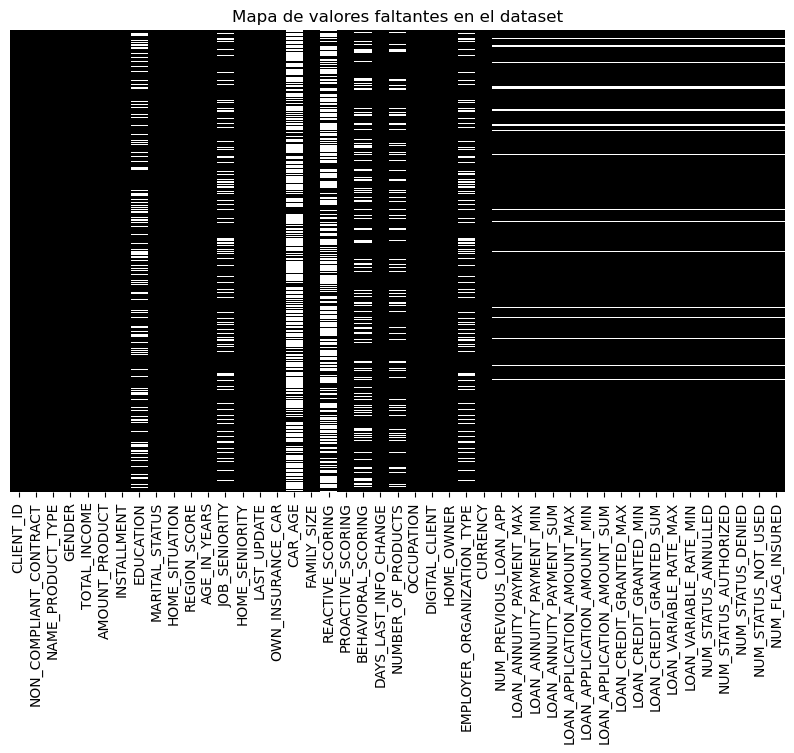

In [36]:
# Identificar Missing values
# Contar valores nulos en cada columna
missing_values = clientes.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
missing_columns = missing_values[missing_values > 0]

# Mostrar resultados
if missing_columns.empty:
    print("No hay valores nulos en el dataset.")
else:
    print("Valores nulos por columna:")
    for column, missing in missing_columns.items():
        print(f"{column}: {missing} valores nulos")

# Gráfico de Missing Values 
plt.figure(figsize=(10, 6))
sns.heatmap(clientes.isnull(), cmap="gray", cbar=False, yticklabels=False)
plt.title("Mapa de valores faltantes en el dataset")
plt.show()

In [37]:
#PORCENTAJE DE VALORES NULOS 
if missing_columns.empty:
    print("No hay valores nulos en las variables numéricas.")
else:
    print("Valores nulos en variables numéricas:")
    for column, missing in missing_columns.items():
        porcentaje = (missing / n_fil) * 100
        print(f"{column}: {missing} NaN ({porcentaje:.2f}%)")

Valores nulos en variables numéricas:
INSTALLMENT: 7 NaN (0.00%)
EDUCATION: 39640 NaN (24.32%)
MARITAL_STATUS: 2 NaN (0.00%)
JOB_SENIORITY: 29174 NaN (17.90%)
CAR_AGE: 107550 NaN (65.99%)
FAMILY_SIZE: 2 NaN (0.00%)
REACTIVE_SCORING: 91901 NaN (56.39%)
PROACTIVE_SCORING: 337 NaN (0.21%)
BEHAVIORAL_SCORING: 32246 NaN (19.79%)
DAYS_LAST_INFO_CHANGE: 1 NaN (0.00%)
NUMBER_OF_PRODUCTS: 21903 NaN (13.44%)
EMPLOYER_ORGANIZATION_TYPE: 29464 NaN (18.08%)
NUM_PREVIOUS_LOAN_APP: 8770 NaN (5.38%)
LOAN_ANNUITY_PAYMENT_MAX: 8770 NaN (5.38%)
LOAN_ANNUITY_PAYMENT_MIN: 8770 NaN (5.38%)
LOAN_ANNUITY_PAYMENT_SUM: 8770 NaN (5.38%)
LOAN_APPLICATION_AMOUNT_MAX: 8770 NaN (5.38%)
LOAN_APPLICATION_AMOUNT_MIN: 8770 NaN (5.38%)
LOAN_APPLICATION_AMOUNT_SUM: 8770 NaN (5.38%)
LOAN_CREDIT_GRANTED_MAX: 8770 NaN (5.38%)
LOAN_CREDIT_GRANTED_MIN: 8770 NaN (5.38%)
LOAN_CREDIT_GRANTED_SUM: 8770 NaN (5.38%)
LOAN_VARIABLE_RATE_MAX: 8770 NaN (5.38%)
LOAN_VARIABLE_RATE_MIN: 8770 NaN (5.38%)
NUM_STATUS_ANNULLED: 8770 NaN (5.38%

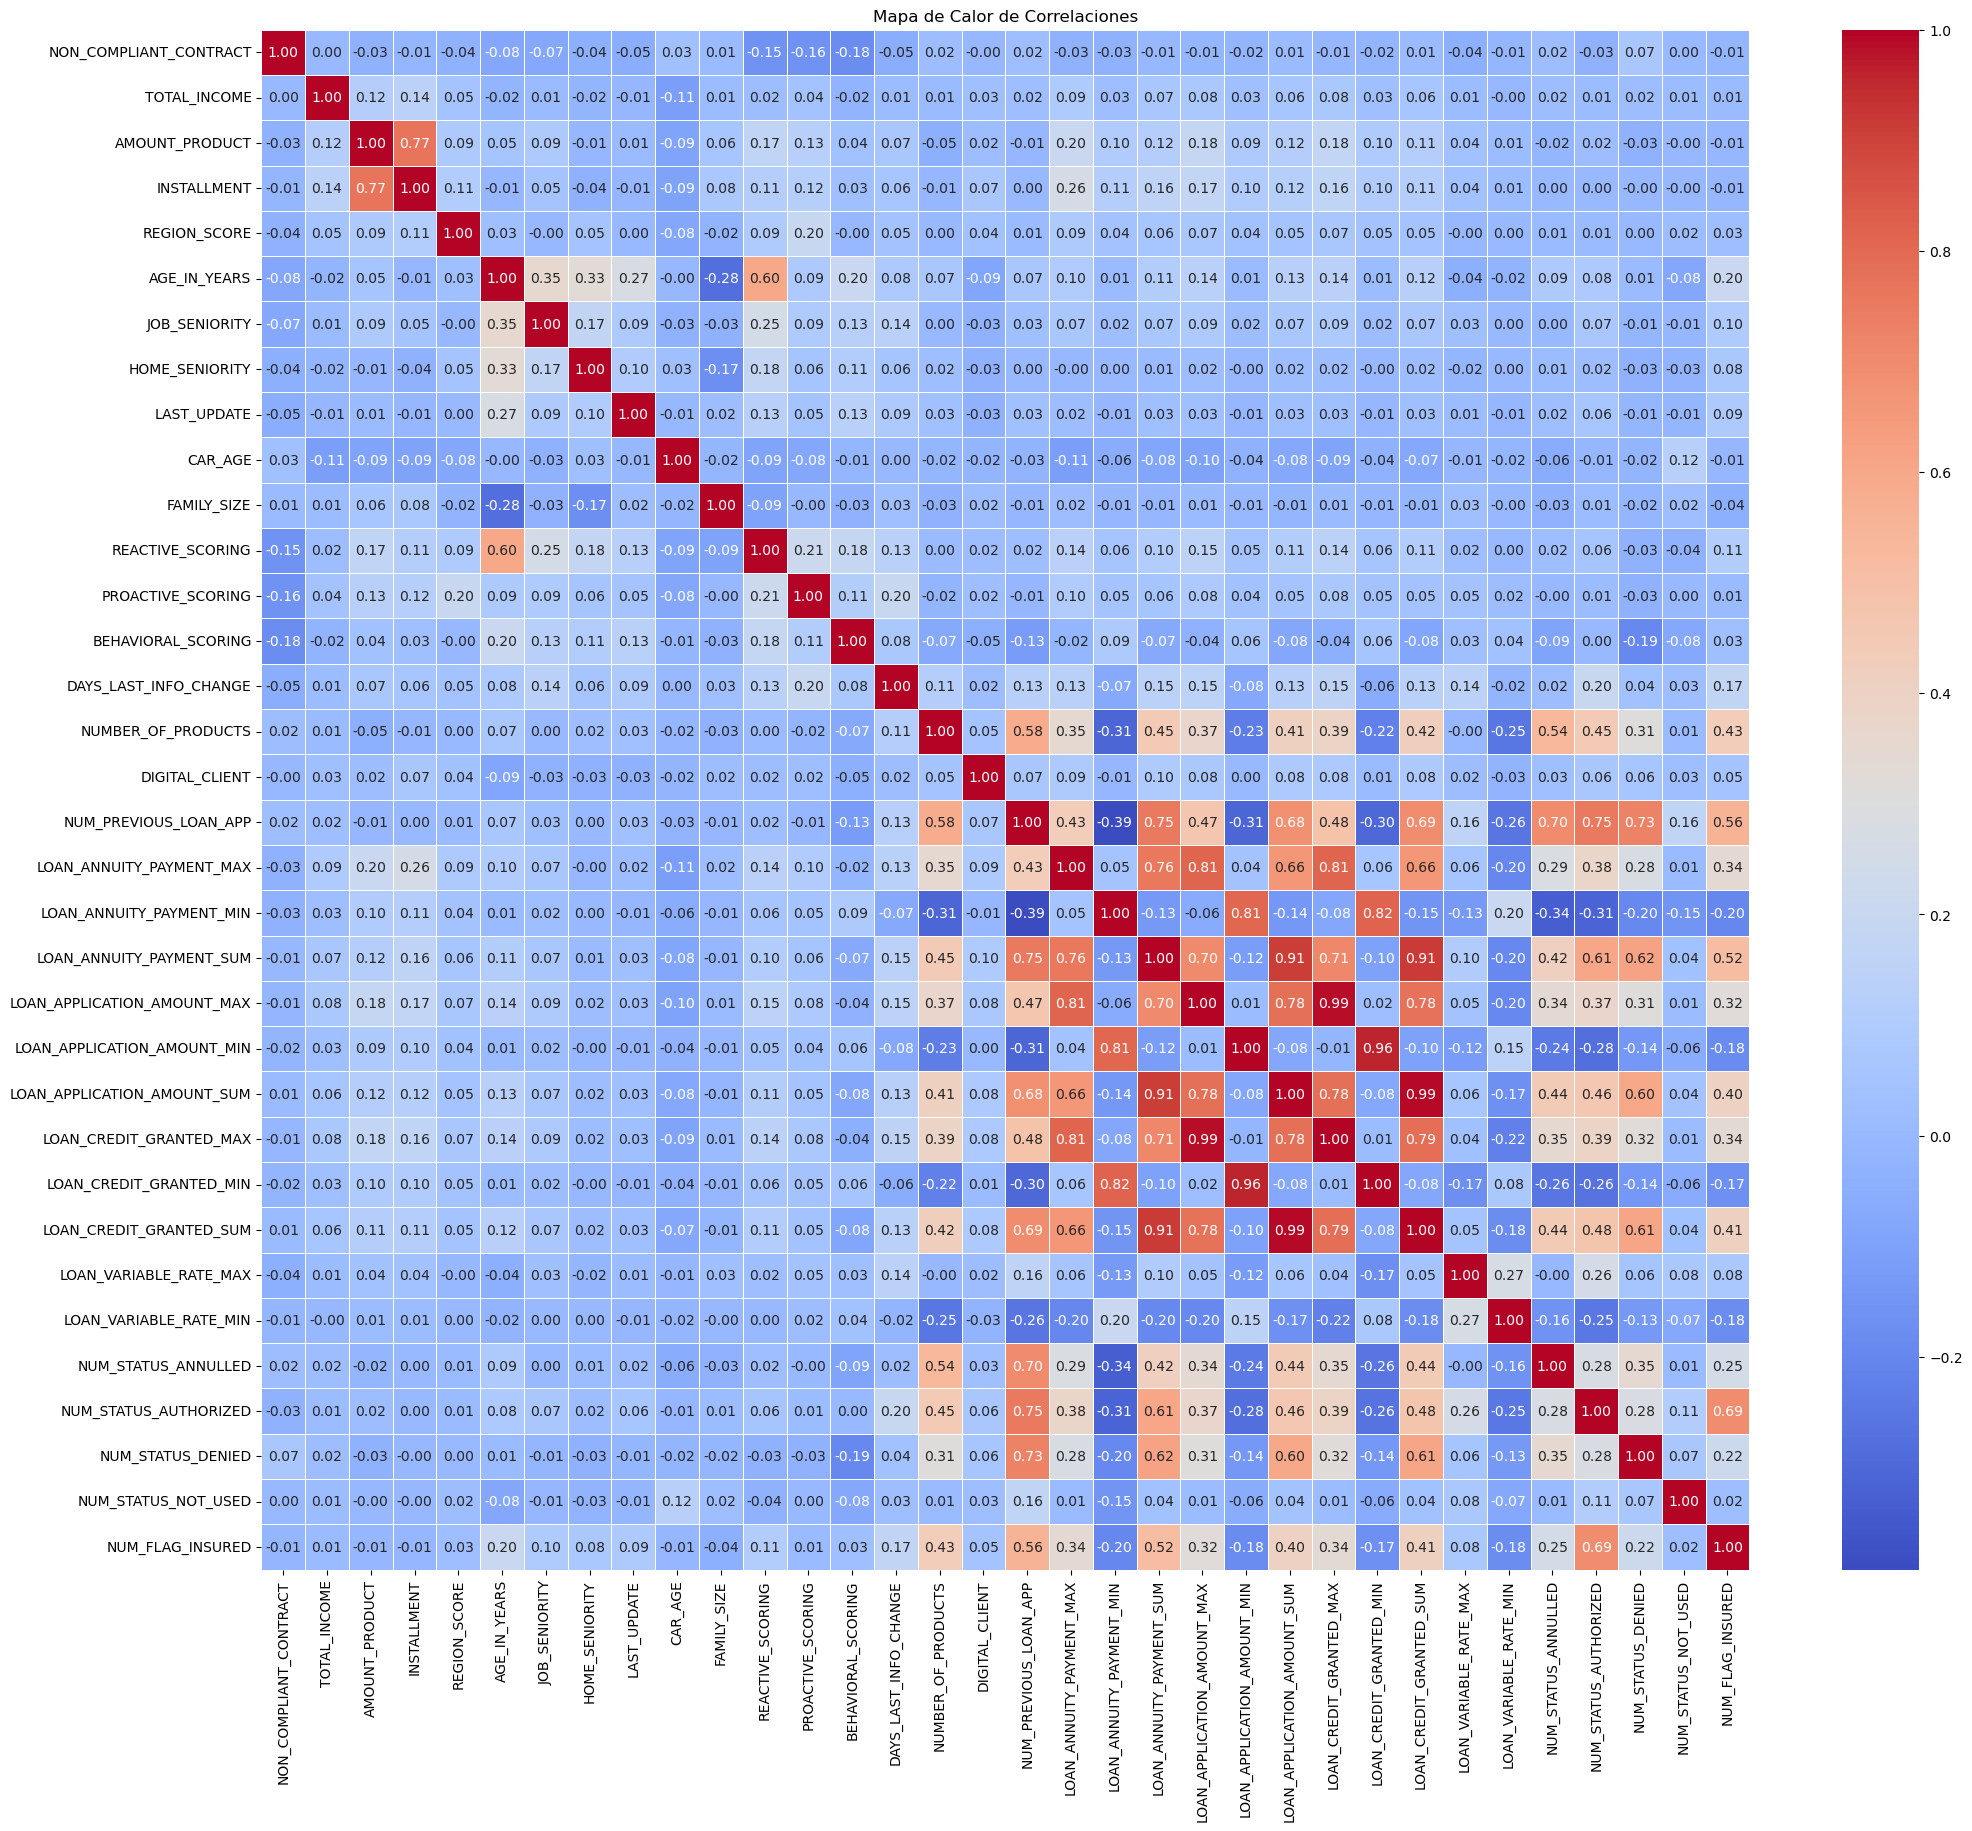

In [38]:
# Mapa térmico para estudiar la correlación entre variables.
# Calcular la matriz de correlación
cl_num = clientes.select_dtypes(exclude=['object', 'bool'])

corr_matrix = cl_num.corr()

# Crear el mapa de calor
plt.figure(figsize=(24, 20))  # Aumenta el tamaño (ancho, alto)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### ANÁLISIS Y CONCLUSIONES COMUNES

In [39]:
# Puesto que hay 1 millon de ID en Behaviour y solo 100k en Clients, se asume que no todos los clientes tienen comportamiento registrado.

# Analisis de cuales faltan 

# Suponiendo que la columna se llama 'CLIENT_ID' en ambas tablas
id_behavioural = set(behavioural["CLIENT_ID"])
id_clientes = set(clientes["CLIENT_ID"])

# IDs que están en CLIENTS pero no en BEHAVIOURAL
faltan_en_clientes = id_clientes - id_behavioural

# IDs que están en BEHAVIOURAL pero no en CLIENTS
faltan_en_behavioural = id_behavioural - id_clientes

print("IDs que faltan en BEHAVIOURAL:")
display(faltan_en_behavioural)

print("\nIDs que faltan en CLIENTS:")
display(faltan_en_clientes)

IDs que faltan en BEHAVIOURAL:


set()


IDs que faltan en CLIENTS:


{'ES182170552E',
 'ES182423810I',
 'ES182304419Q',
 'ES182328307B',
 'ES182306082L',
 'ES182377959C',
 'ES182153411N',
 'ES182267629L',
 'ES182108014V',
 'ES182318940A',
 'ES182100832O',
 'ES182337330N',
 'ES182430722S',
 'ES182448110C',
 'ES182204593C',
 'ES182343854J',
 'ES182400245A',
 'ES182340176R',
 'ES182385989J',
 'ES182161905F',
 'ES182361826N',
 'ES182170790A',
 'ES182326810R',
 'ES182150320B',
 'ES182200781D',
 'ES182113467V',
 'ES182352040Z',
 'ES182203495K',
 'ES182184838P',
 'ES182373513Z',
 'ES182448132D',
 'ES182145177S',
 'ES182191273K',
 'ES182392263B',
 'ES182189885N',
 'ES182164226S',
 'ES182220739E',
 'ES182249710C',
 'ES182215364X',
 'ES182211871S',
 'ES182389378D',
 'ES182362159Y',
 'ES182382630B',
 'ES182444583Q',
 'ES182311675A',
 'ES182255495G',
 'ES182406296U',
 'ES182409002H',
 'ES182107378J',
 'ES182348937B',
 'ES182351470X',
 'ES182199723F',
 'ES182307736L',
 'ES182126889X',
 'ES182289516E',
 'ES182392367A',
 'ES182162453U',
 'ES182422731B',
 'ES182283933R

In [40]:
n_falt_clients = len(faltan_en_clientes)
print(n_falt_clients)


116931
